In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
from common import graph_hist
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')

# 1. Carga del conjunto datos

In [3]:
data_accident = pd.read_pickle("data/data_accident.pkl") 

# 2. Información general del conjunto de datos

## Número y tipo de atributos del conjunto de datos

In [4]:
data_accident.shape

(365657, 22)

El conjunto de datos cuenta con **365657** filas y **22** atributos. 
Este conjunto de datos es el resultado de un proceso de ETL (Extraccion Transfer and Loading), con el script **etl_process.py**, que se puede encontrar en el presente repositorio


In [5]:
(
    data_accident
    .dtypes
    .value_counts()
)

int64      11
object      9
float64     2
dtype: int64

Se aprecia que de los 22 atributos 11 son de tipo entero, 9 de tipo categórico o string y 2 de tipo flotante.

In [6]:
data_accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365657 entries, 0 to 39507
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   State                    365657 non-null  object 
 1   Total vehicles involved  365657 non-null  int64  
 2   Vehicles in motion       365657 non-null  int64  
 3   Parked vehicles          365657 non-null  int64  
 4   Pedestrian               365657 non-null  int64  
 5   Cyclists                 365657 non-null  int64  
 6   Persons in Vehicles      365657 non-null  int64  
 7   persons                  365657 non-null  int64  
 8   County                   365657 non-null  object 
 9   City                     365657 non-null  object 
 10  Day of month             365657 non-null  int64  
 11  Month                    365657 non-null  object 
 12  Year                     365657 non-null  int64  
 13  Day of week              365657 non-null  object 
 14  Hour 

## Exploración de presencia de valores nulos 

In [7]:
(
    data_accident
    .isnull()
    .sum()
)

statename       0
ve_total        0
ve_forms        0
pvh_invl        0
peds            0
pernotmvit      0
permvit         0
persons         0
county          0
city            0
day             0
monthname       0
year            0
day_weekname    0
hour            0
routename       0
latitude        0
longitud        0
lgt_condname    0
weathername     0
fatals          0
code_state      0
dtype: int64

In [7]:
(
    data_accident
    .isna()
    .sum()
)

State                      0
Total vehicles involved    0
Vehicles in motion         0
Parked vehicles            0
Pedestrian                 0
Cyclists                   0
Persons in Vehicles        0
persons                    0
County                     0
City                       0
Day of month               0
Month                      0
Year                       0
Day of week                0
Hour                       0
Route                      0
latitude                   0
longitud                   0
Ligth condition            0
Climatic condition         0
Fatals                     0
code_state                 0
dtype: int64

Lo anterior pone en evidencia que el conjunto de datos no tiene ni valores nulos ni vacíos.

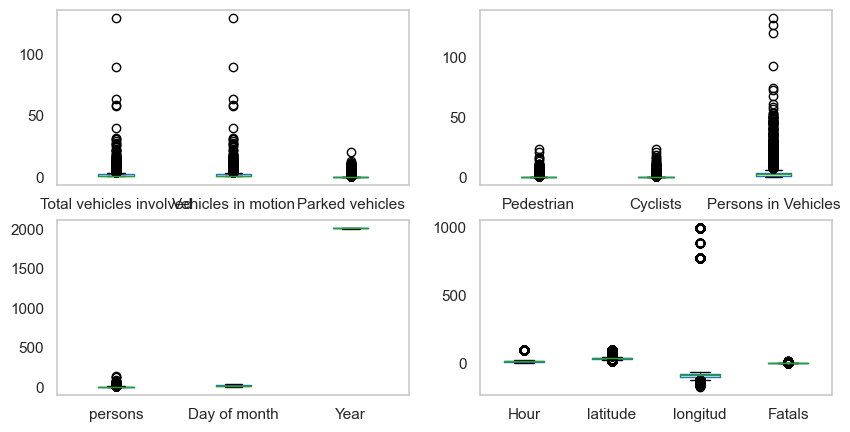

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax = ax.ravel()
data_accident.select_dtypes(include='number').iloc[:, 0:3].boxplot(grid=False, ax=ax[0])  
data_accident.select_dtypes(include='number').iloc[:, 3:6].boxplot(grid=False, ax=ax[1])  
data_accident.select_dtypes(include='number').iloc[:, 6:9].boxplot(grid=False, ax=ax[2])  
data_accident.select_dtypes(include='number').iloc[:, 9:].boxplot(grid=False, ax=ax[3])  
plt.show()

In [11]:
def count_outliers(data):

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    upper_outlier = len(np.where(data>=upper)[0])
    lower_outlier = len(np.where(data<=lower)[0])
    return lower_outlier, upper_outlier

In [12]:
data_accident.select_dtypes(include='number').apply(count_outliers)

,Total vehicles involved,Vehicles in motion,Parked vehicles,Pedestrian,Cyclists,Persons in Vehicles,persons,Day of month,Year,Hour,latitude,longitud,Fatals
0,0,0,355677,291701,289969,0,0,0,0,0,1006,4189,339596
1,7907,6412,365657,365657,365657,16736,16907,0,0,2734,3084,2396,365657


A partir de los diagramas de cajas y el reporte obtenido con la función count_outliers, se aprecia que la única variable que no presenta outliers es dia del mes. Por otro lado se aprecia que atributos como Parked vehicles, Pedestrian, Cyclists y Fatals, presentan outliers, por arriba y por abajo del rango intercuartílico. 

Un aspecto a considerar al momento de implementar el dashboard es determinar si los valores atípicos se deben a la errores de muestreo, o es intrinsica del conjunto de datos. En tal sentido se consultó el documento [FARS Analytical Users Manual 1975-2020](https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/813417), donde se encuentra información detallada del conjunto de datos, tal como la notación de cada atributo. 

Luego de revisar detalladamente cada atributo se aprecia que los valores atipícos son intrinsecos del proceso de recopilación y no es necesario aplicar técnicas de eliminación o imputación de datos.

# 3. Estadística Descriptiva

In [13]:
data_accident.describe(include=object)

,State,County,City,Month,Day of week,Route,Ligth condition,Climatic condition,code_state
count,365657,365657,365657,365657,365657,365657,365657,365657,365657
unique,51,326,4009,12,7,12,13,14,51
top,Texas,Coosa,Not Applicable,October,Saturday,State Highway,Daylight,Clear,TX
freq,36224,10530,182615,33978,64378,106922,172807,259503,36224


In [14]:
data_accident.describe(include=[np.number])

,Total vehicles involved,Vehicles in motion,Parked vehicles,Pedestrian,Cyclists,Persons in Vehicles,persons,Day of month,Year,Hour,latitude,longitud,Fatals
count,365657.000000,365657.000000,365657.000000,365657.000000,365657.000000,365657.000000,365657.000000,365657.000000,365657.000000,365657.000000,365657.000000,365657.000000,365657.000000
mean,1.556694,1.517715,0.038979,0.218426,0.228195,2.237490,2.247259,15.647982,2016.237512,13.472344,36.951237,-85.398330,1.087396
std,0.860944,0.821653,0.284352,0.473057,0.499322,1.811366,1.815221,8.828757,3.171664,10.137714,7.102950,86.988697,0.356454
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,0.000000,18.960467,-174.204181,1.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,2014.000000,7.000000,33.119486,-98.072214,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,16.000000,2016.000000,14.000000,36.303769,-87.807978,1.000000
75%,2.000000,2.000000,0.000000,0.000000,0.000000,3.000000,3.000000,23.000000,2019.000000,19.000000,40.568781,-81.428308,1.000000
max,130.000000,130.000000,20.000000,23.000000,23.000000,133.000000,133.000000,31.000000,2021.000000,99.000000,99.999900,999.999900,20.000000


El atributo **Hour** tiene como valor máximo 99, que en principio debería ser 23. Sin embargo, de acuerdo a [FARS Analytical Users Manual 1975-2020](https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/813417), el valor 99 se asigna porque la hora no fue definida al momento de generar el reporte del accidente.

## Conteo variables categóricas

<Axes: >

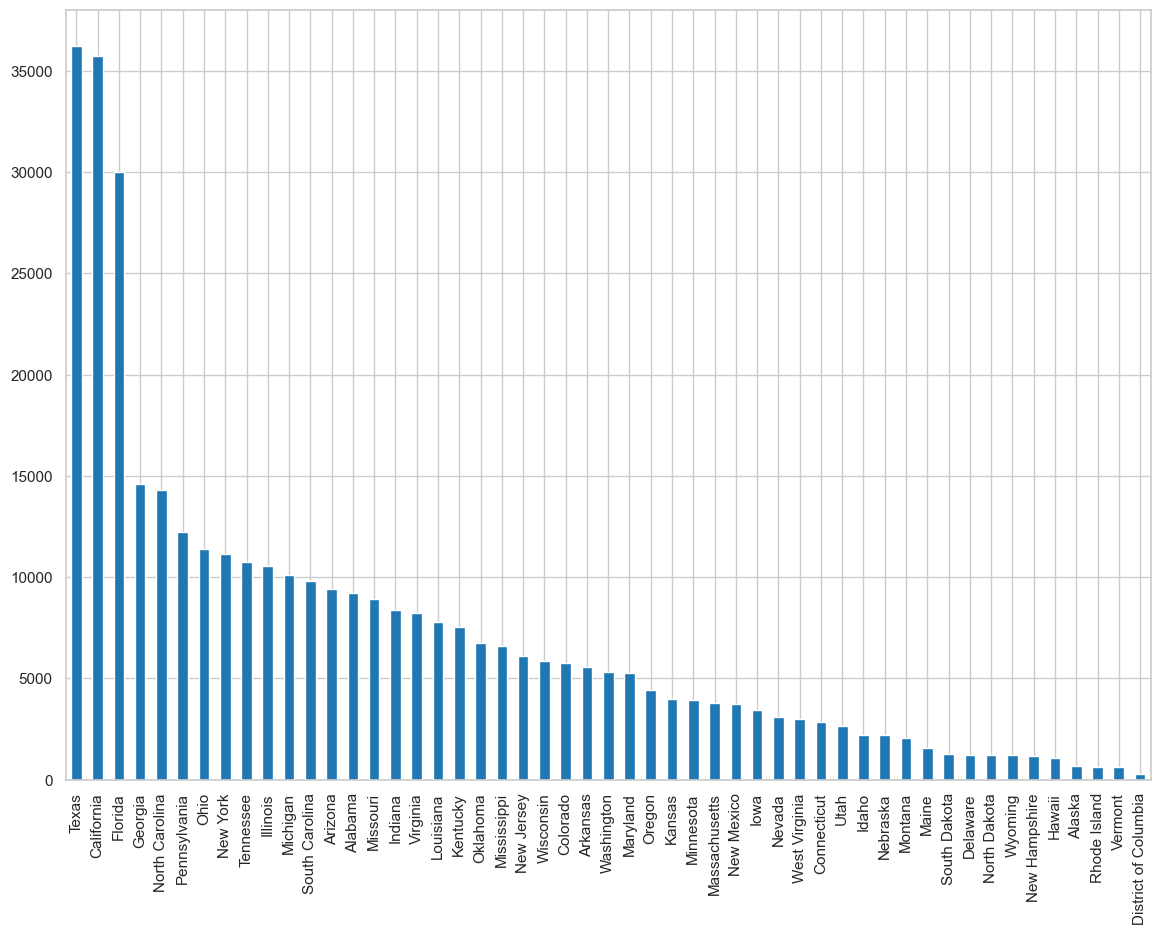

In [16]:
(
    data_accident
    .State
    .value_counts()
    .plot(
        kind='bar',
        figsize=(14, 10)
    )
)

<Axes: >

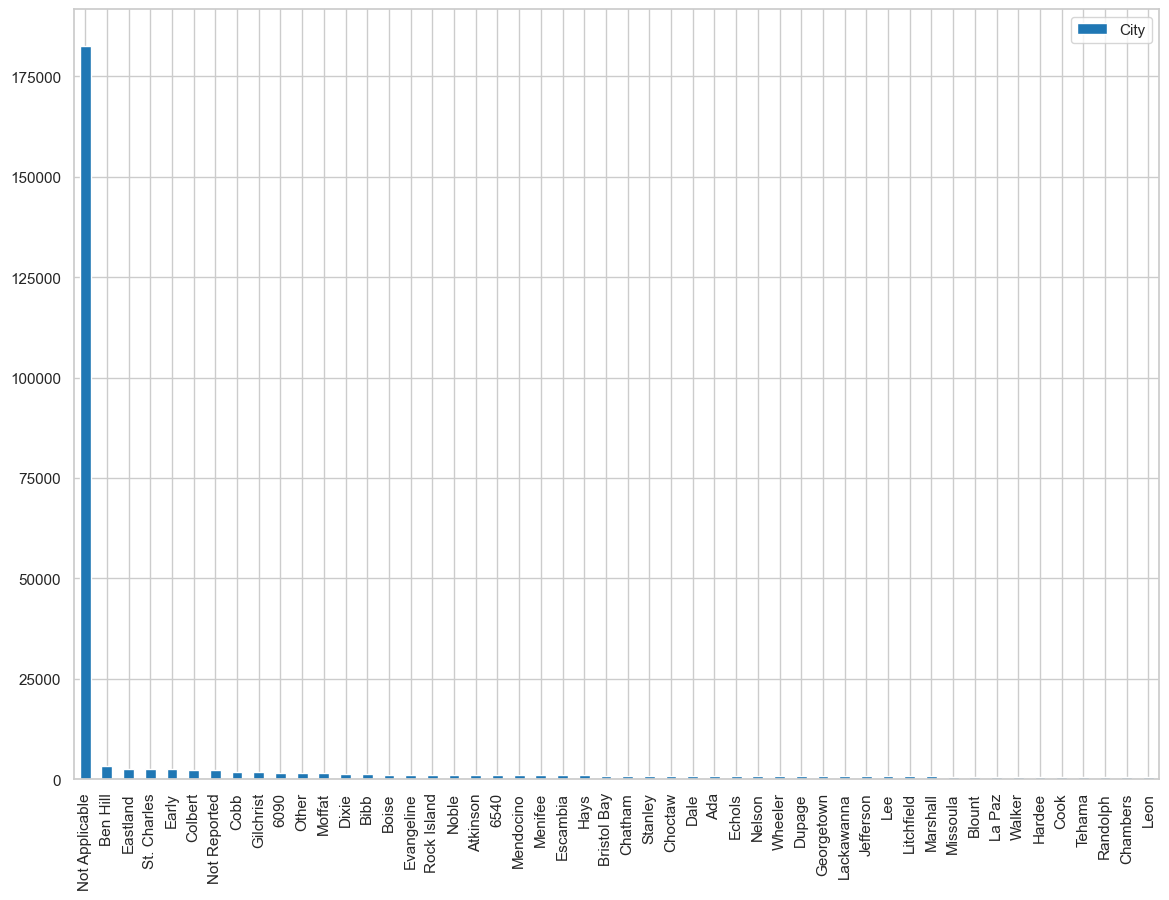

In [17]:
(
    data_accident
    .City
    .value_counts()
    .to_frame()
    .head(50)
    .plot(
        kind='bar',
        figsize=(14, 10)
    )
)

En el gráfico anterior se aprecia un outlier en el valor **Not Applicable**, el cual de acuerdo con [FARS Analytical Users Manual 1975-2020](https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/813417), se asigna porque la ciudad no fue definida al momento de generar el reporte del accidente.

<Axes: >

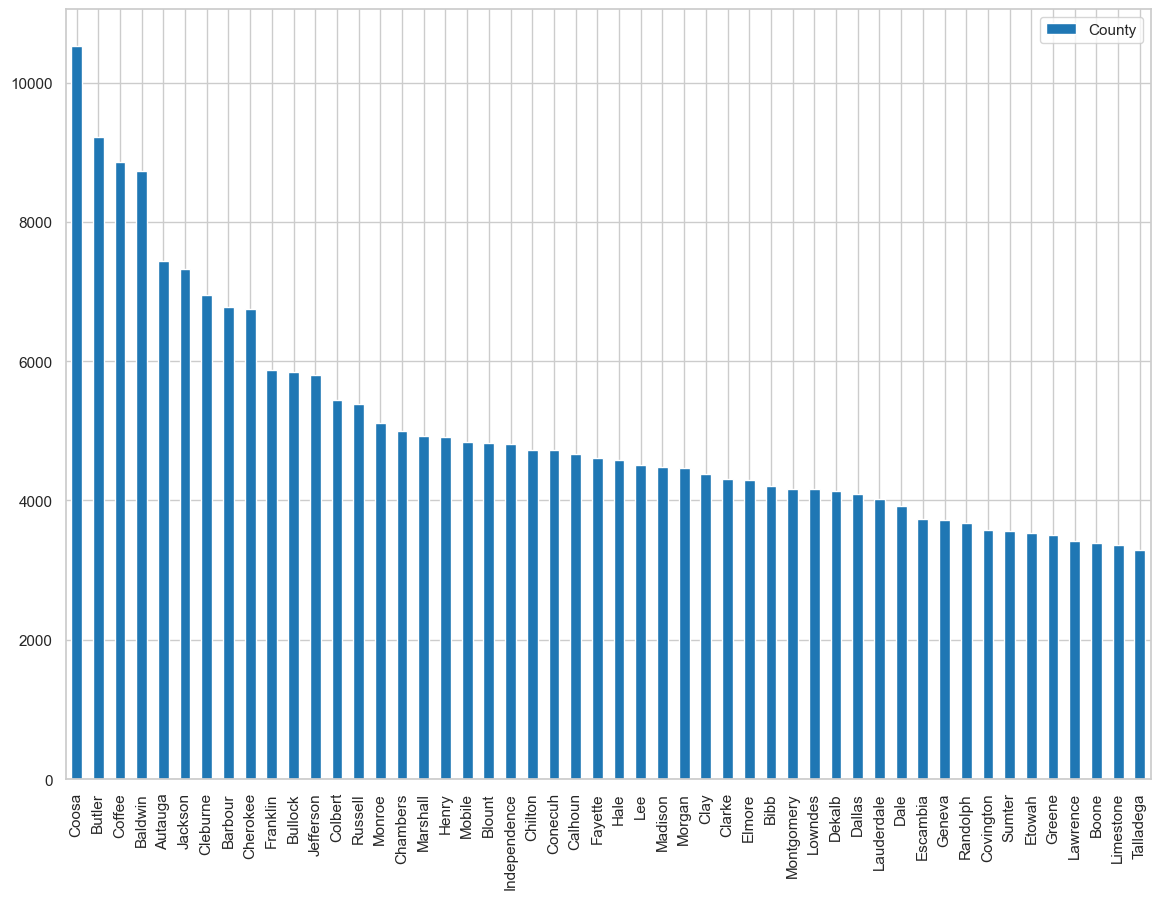

In [18]:
(
    data_accident
    .County
    .value_counts()
    .to_frame()
    .head(50)
    .plot(
        kind='bar',
        figsize=(14, 10)
    )
)

<Axes: >

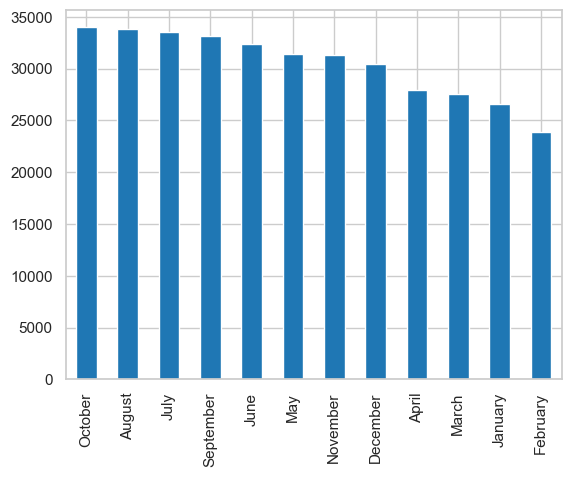

In [19]:
(
    data_accident
    .Month
    .value_counts()
    .plot(
        kind='bar',
    )
)

<Axes: >

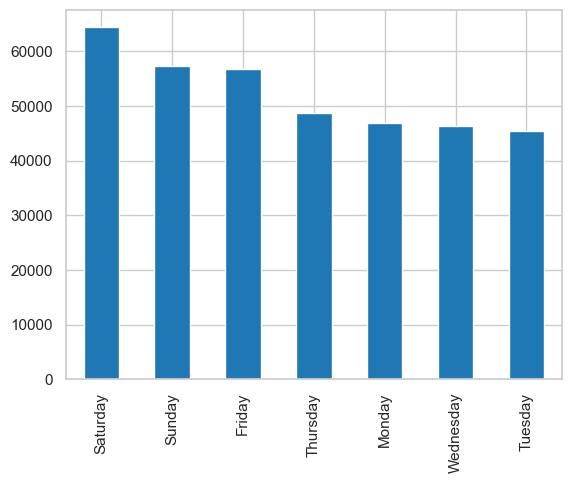

In [21]:
(
    data_accident['Day of week']
    .value_counts()
    .plot(
        kind='bar',
    )
)

<Axes: >

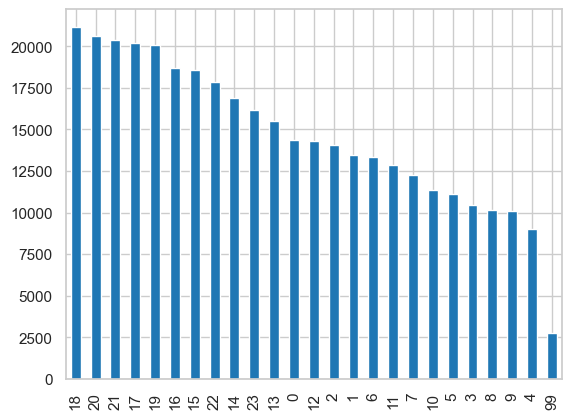

In [22]:
(
    data_accident
    .Hour
    .value_counts()
    .plot(
        kind='bar',
    )
)

<Axes: >

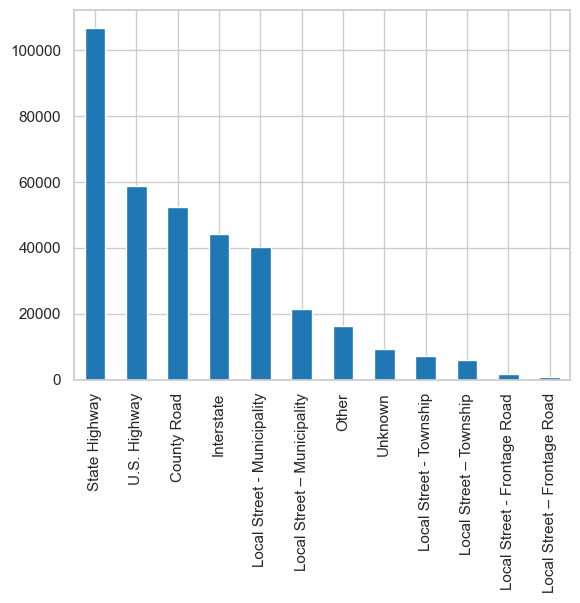

In [23]:

(
    data_accident
    .Route
    .value_counts()
    .plot(
        kind='bar',
    )
)

<Axes: >

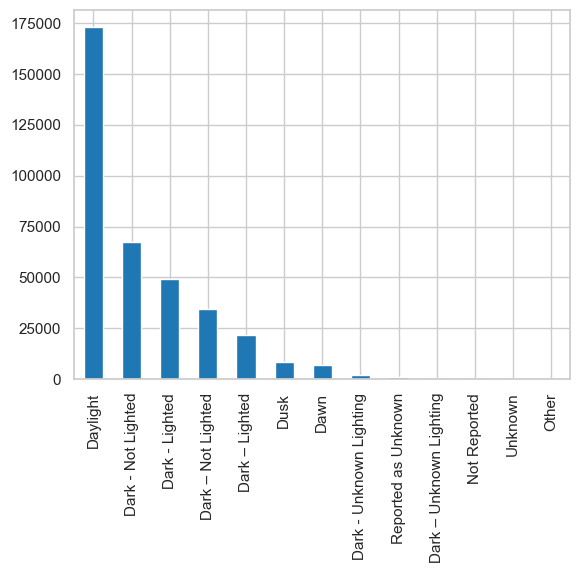

In [24]:
(
    data_accident['Ligth condition']
    .value_counts()
    .plot(
        kind='bar',
    )
)

<Axes: >

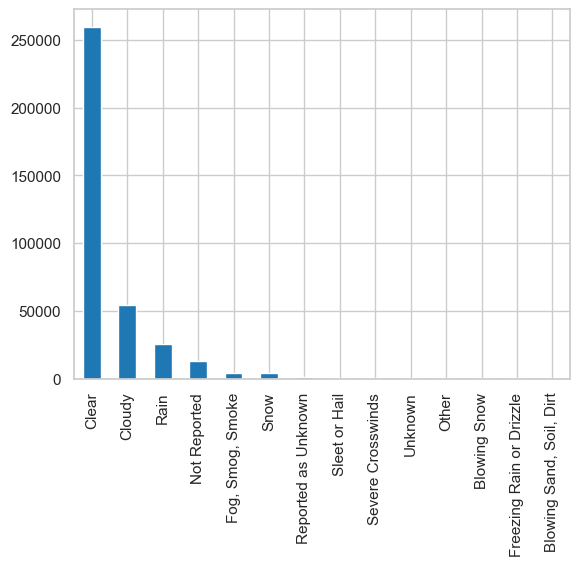

In [25]:
(
    data_accident['Climatic condition']
    .value_counts()
    .plot(
        kind='bar',
    )
)

## Histograma de variables numéricas

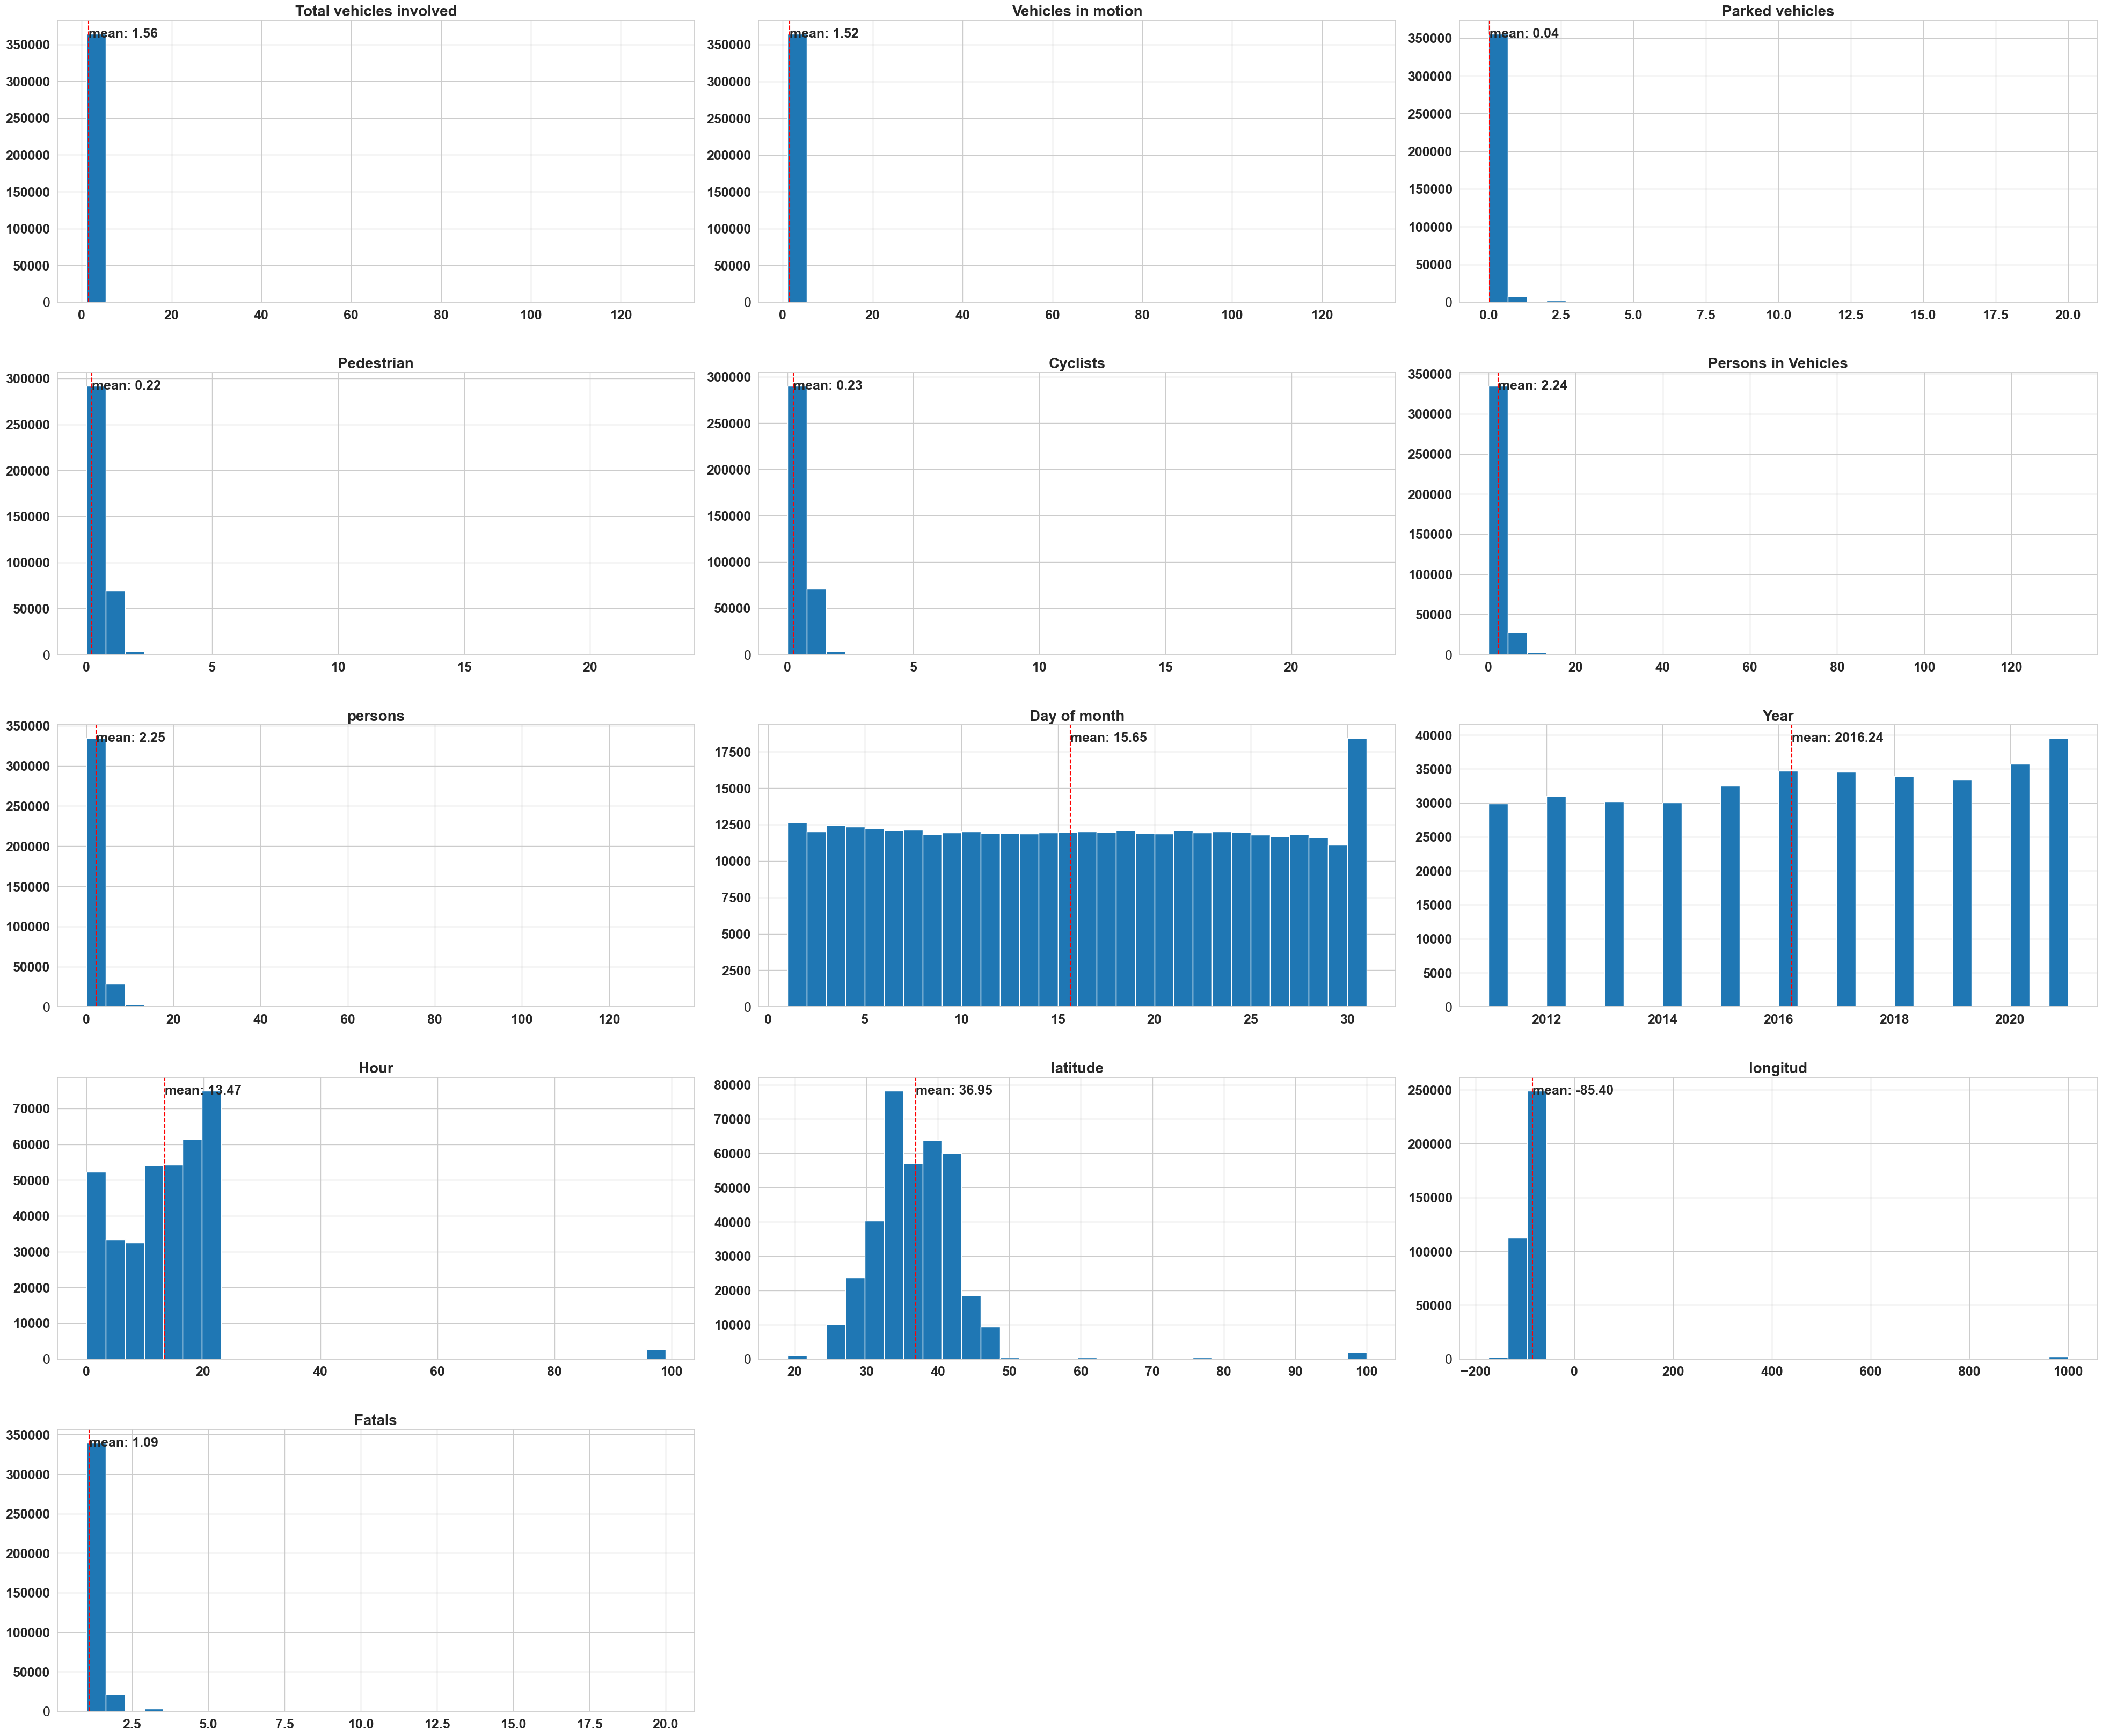

In [26]:
graph_hist(data_accident.select_dtypes(include='number'))

En el gráfico anterior no se observa un distribución de tipo normal en las variables numéricas.
En las variables dia del mes y años se observa un distribución de tipo uniforme, la variable latitud tiende a ser normal, pero presenta algunos outliers. Las variables restantes presentan un distribución con sesgo a la derecha. Lo cual se evidenció en los gráficos de cajas y el reporte de outliers.

# 3. Análisis multivarido

## Gráfico de dispersion

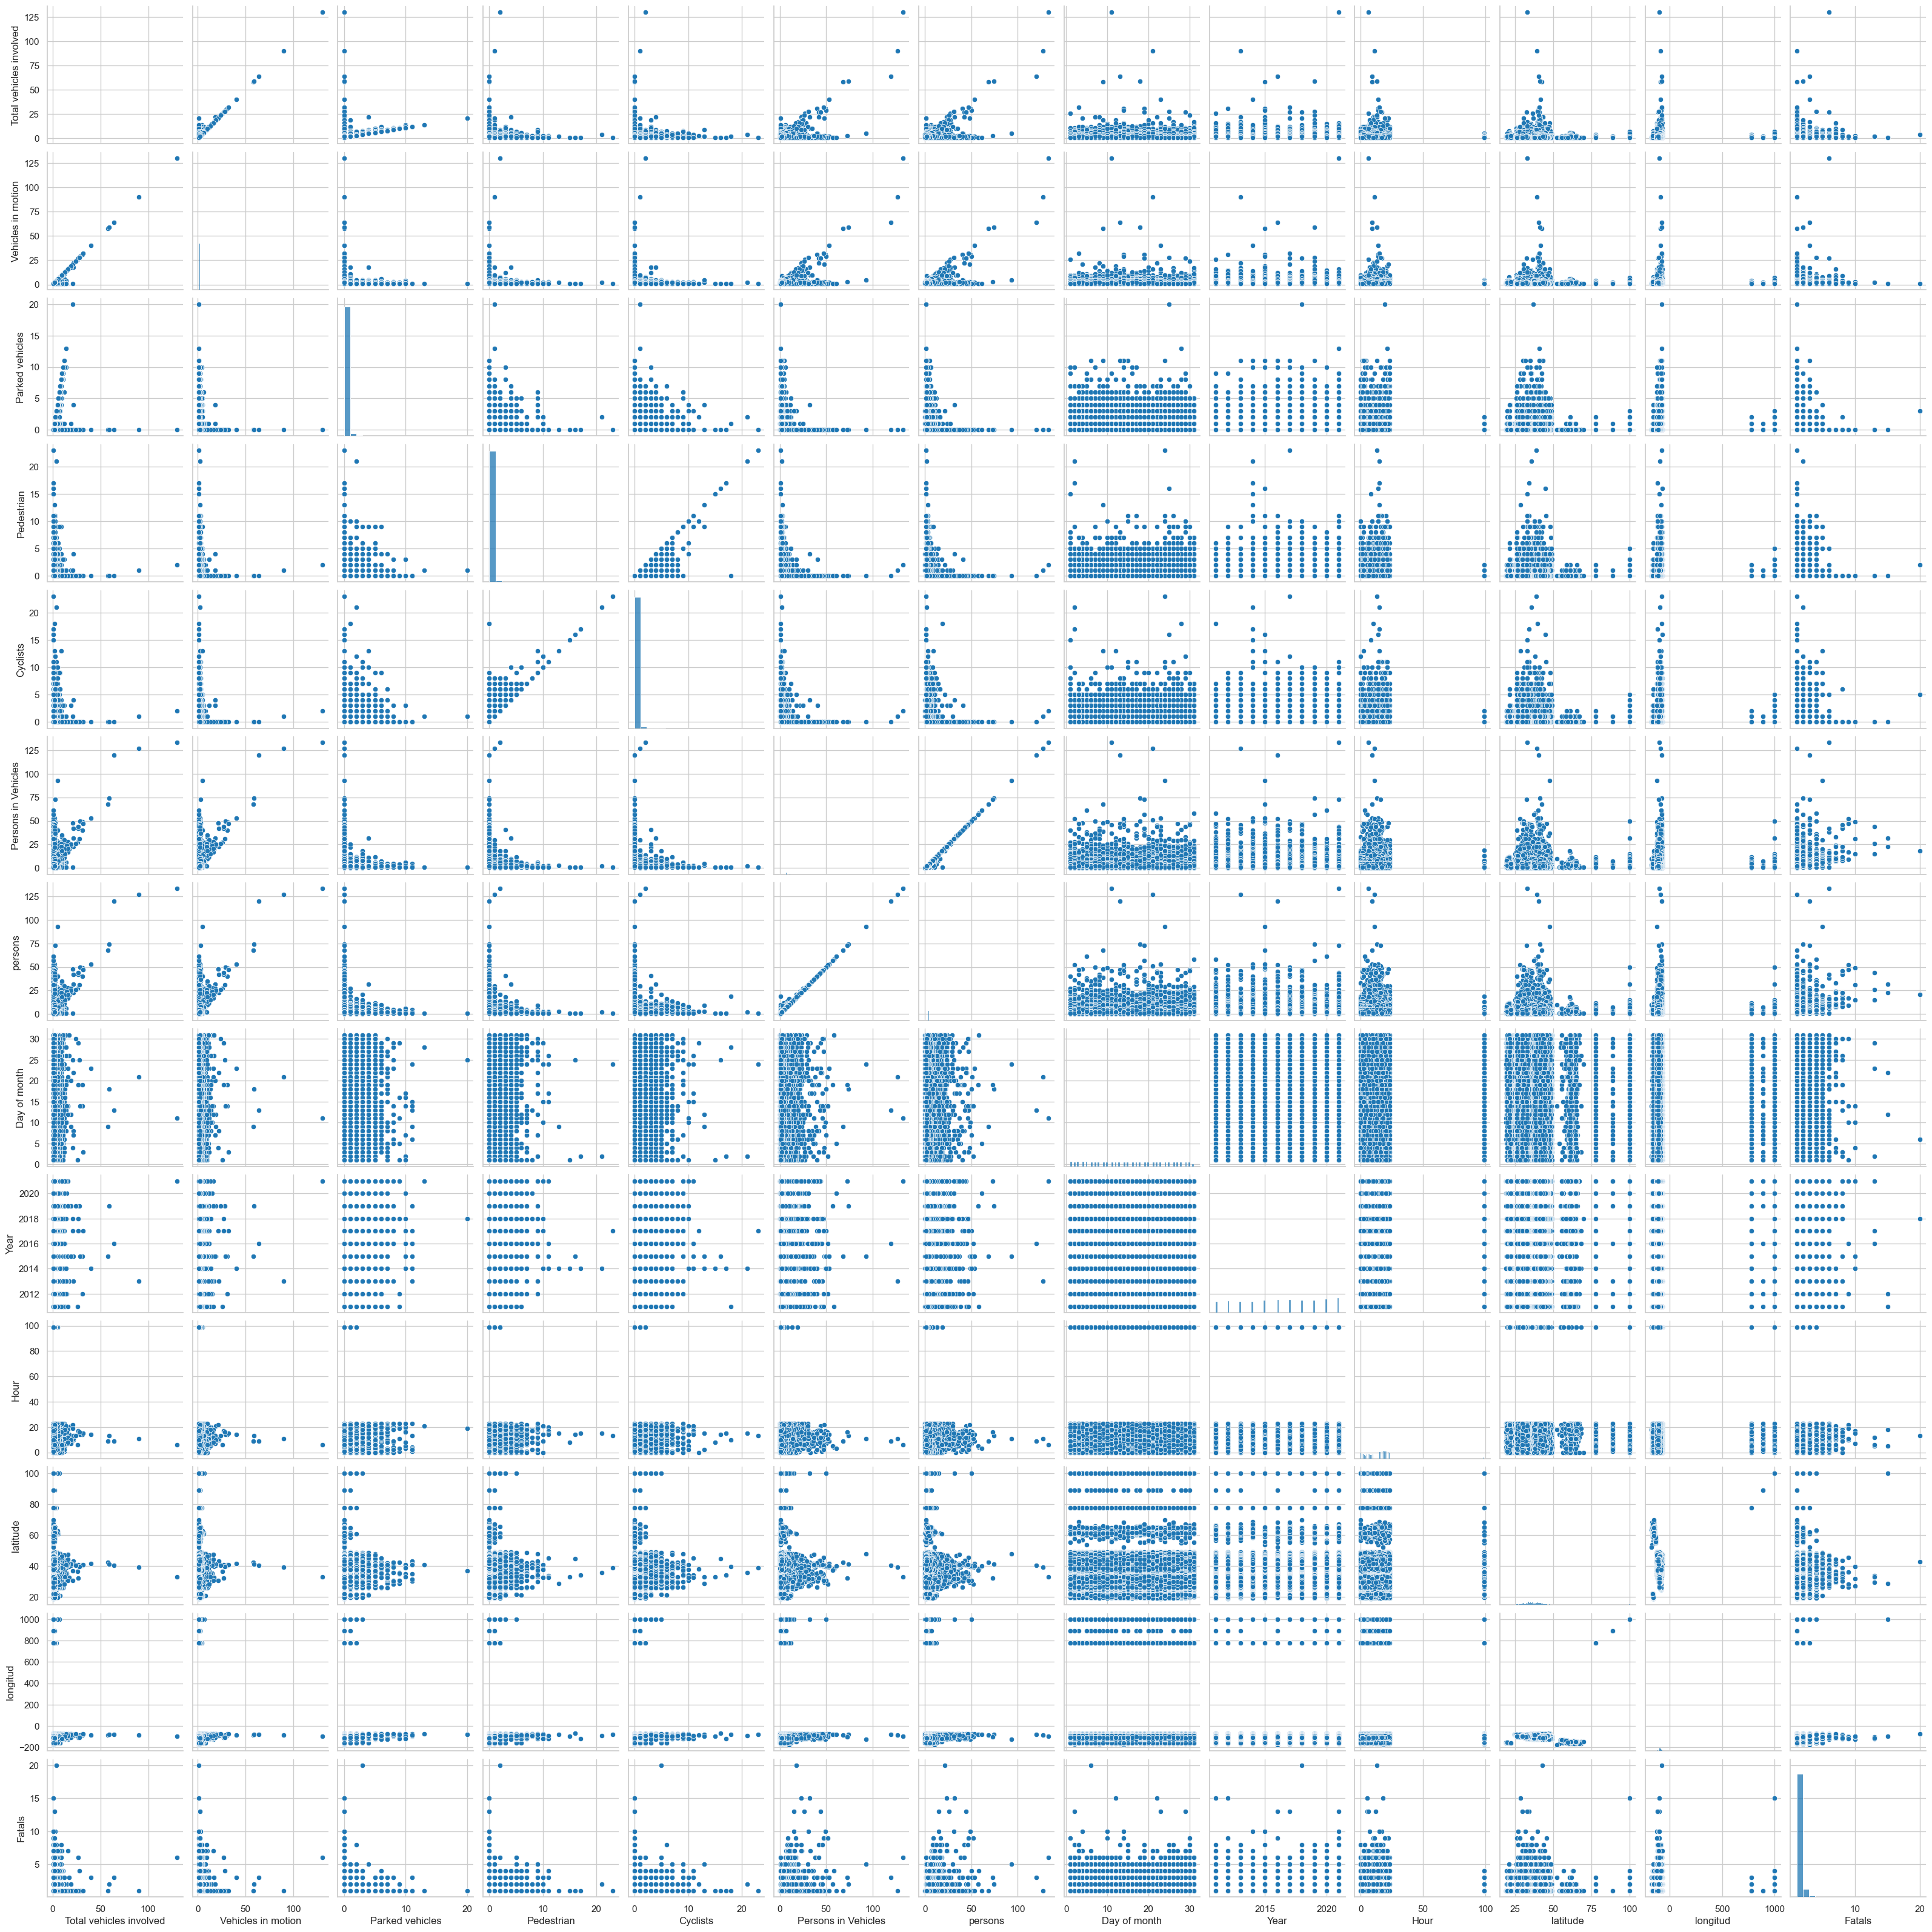

In [28]:
sns.pairplot(data_accident.select_dtypes(include='number'))

## Correlación variables numéricas

<Axes: >

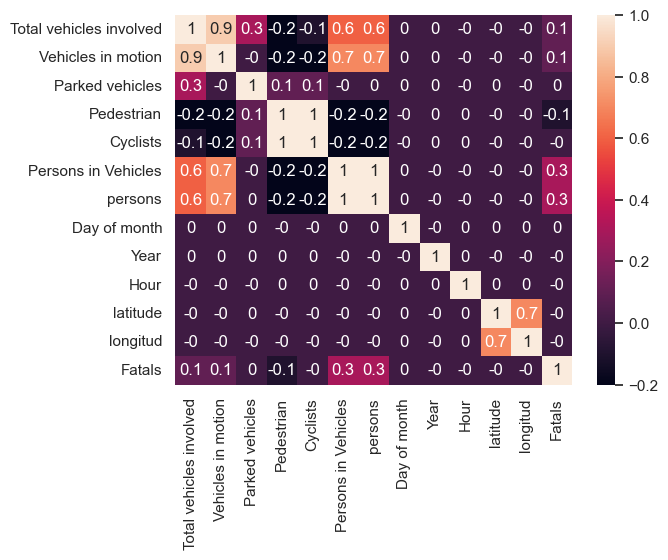

In [27]:
data_corr = data_accident.select_dtypes(include='number').corr().round(1)
sns.heatmap(data_corr, annot=True, fmt='.1g')

Apartir del gráfico de dispersión y de correlación de las variables númericas, se aprecia  un comportamiento lineal con correlación positiva y mayor que 0.6, entre las variables Cyclist y Pedestrian, Persons in Vehicles y persons, Persons in Vehicles y Vehicles in motion, Total vehicles involved y Vehicles in motion. 

Las correlaciones entre variables restantes presentan correlaciones menores a 0.3, tal como: Fatals y Persons in Vehicles y persons, Parked vehicles y Total vehicles involved. Finalmente se aprecia correlación negativa de -0.2 entre las variables: Persons y Pedestrian, Pedestrian y Persons in Vehicle, Cyclist y Persons in Vehicle. De igual manera entre Vehicles in motion, Total vehicles involved con Pedestrian y Cyclist.
